Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics,svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.metrics import f1_score,log_loss,accuracy_score,recall_score,cohen_kappa_score,roc_auc_score,confusion_matrix,precision_score,classification_report, confusion_matrix ,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import itertools



Read CSV file

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

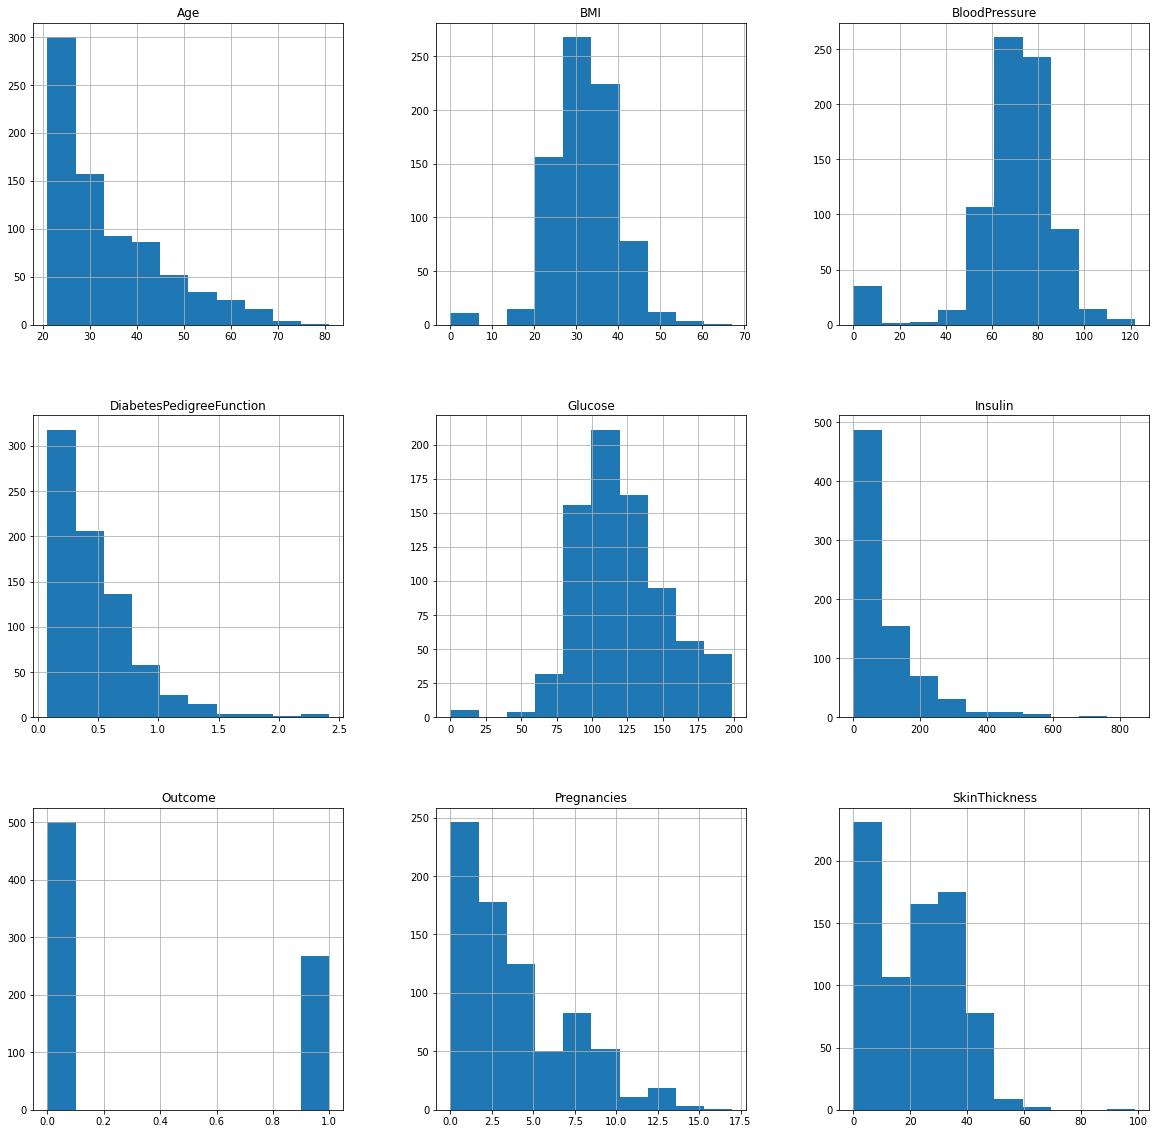

In [8]:
his = df.hist(figsize = (20,20))

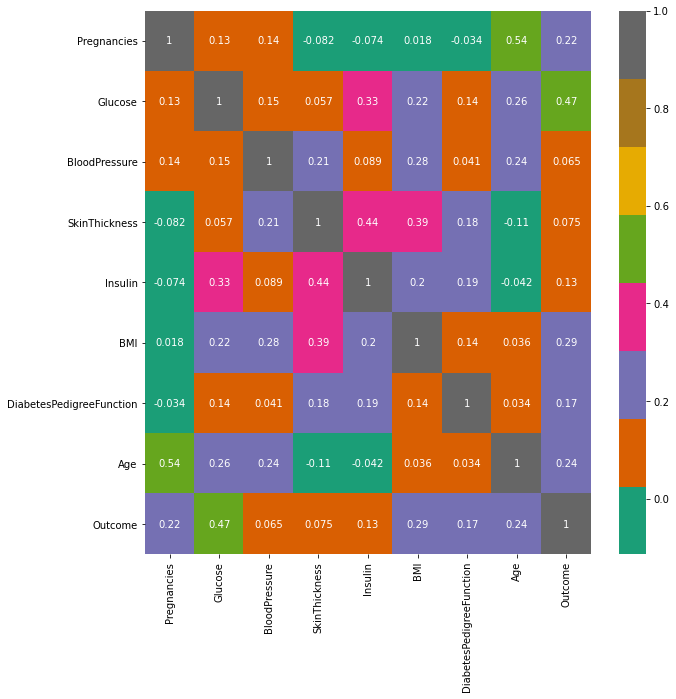

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Dark2", annot= True,)
plt.show()

In [10]:
df1 = df.copy(deep = True)
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df1.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
df1['Glucose'].fillna(df1['Glucose'].median(), inplace = True)
df1['BloodPressure'].fillna(df1['BloodPressure'].median(), inplace = True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)
df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

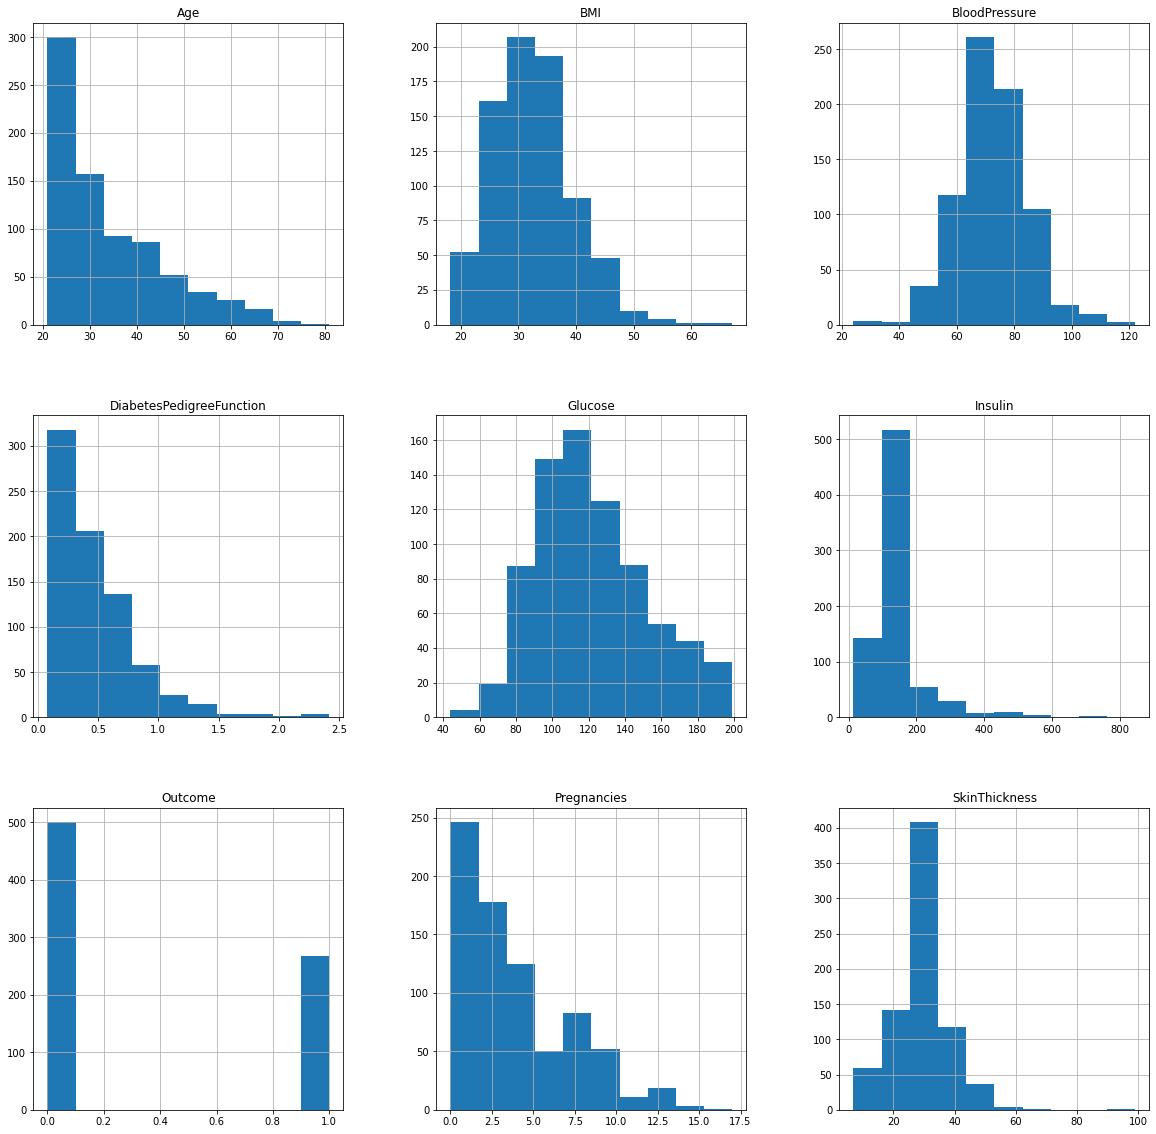

In [12]:
his1 = df1.hist(figsize = (20,20))

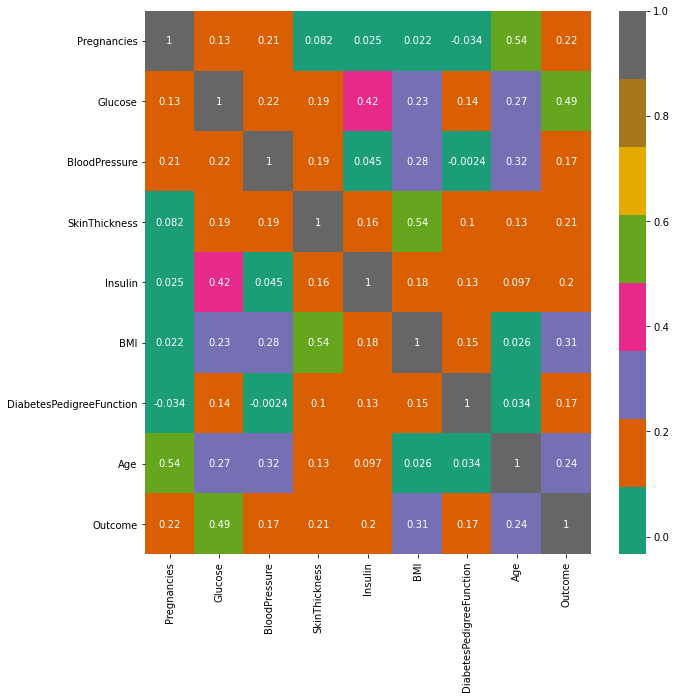

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="Dark2", annot= True,)
plt.show()

In [14]:
df1.corr()['Outcome'].sort_values()

BloodPressure               0.165723
DiabetesPedigreeFunction    0.173844
Insulin                     0.203790
SkinThickness               0.214873
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312038
Glucose                     0.492782
Outcome                     1.000000
Name: Outcome, dtype: float64

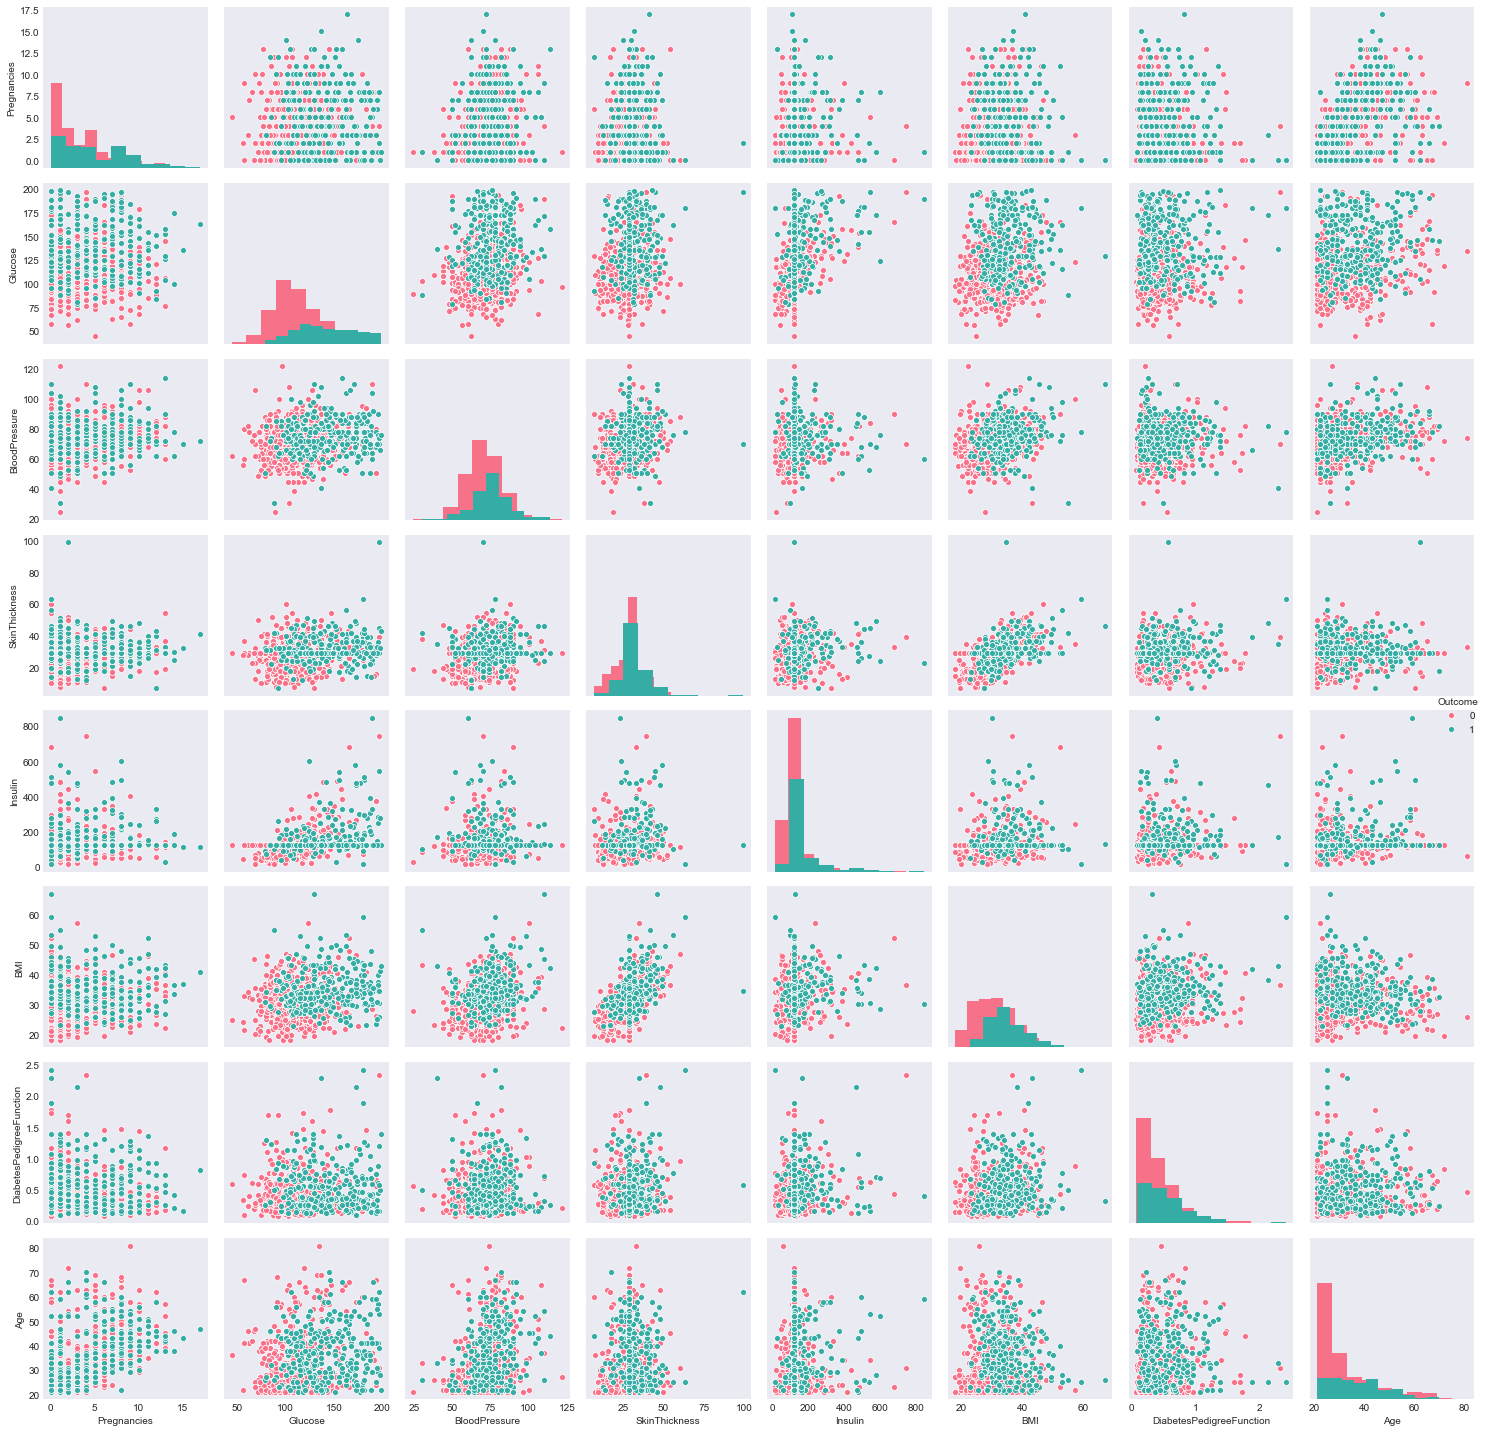

In [15]:
plt.style.use('seaborn-dark')
sns.pairplot(df1,hue='Outcome', palette='husl', diag_kind="hist");
plt.tight_layout()

Text(0, 0.5, 'Count Of Patients')

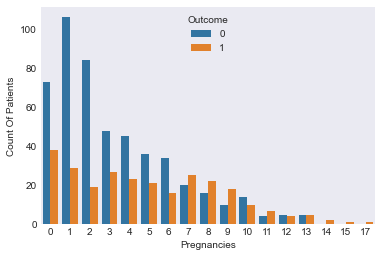

In [16]:
sns.countplot(x = 'Pregnancies',hue = 'Outcome',data = df1)

plt.xlabel("Pregnancies")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

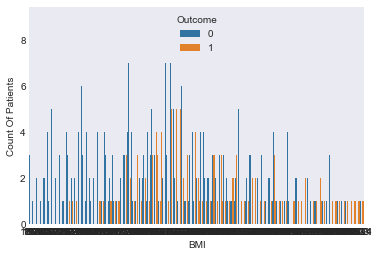

In [17]:
sns.countplot(x = 'BMI',hue = 'Outcome',data = df1)

plt.xlabel("BMI")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

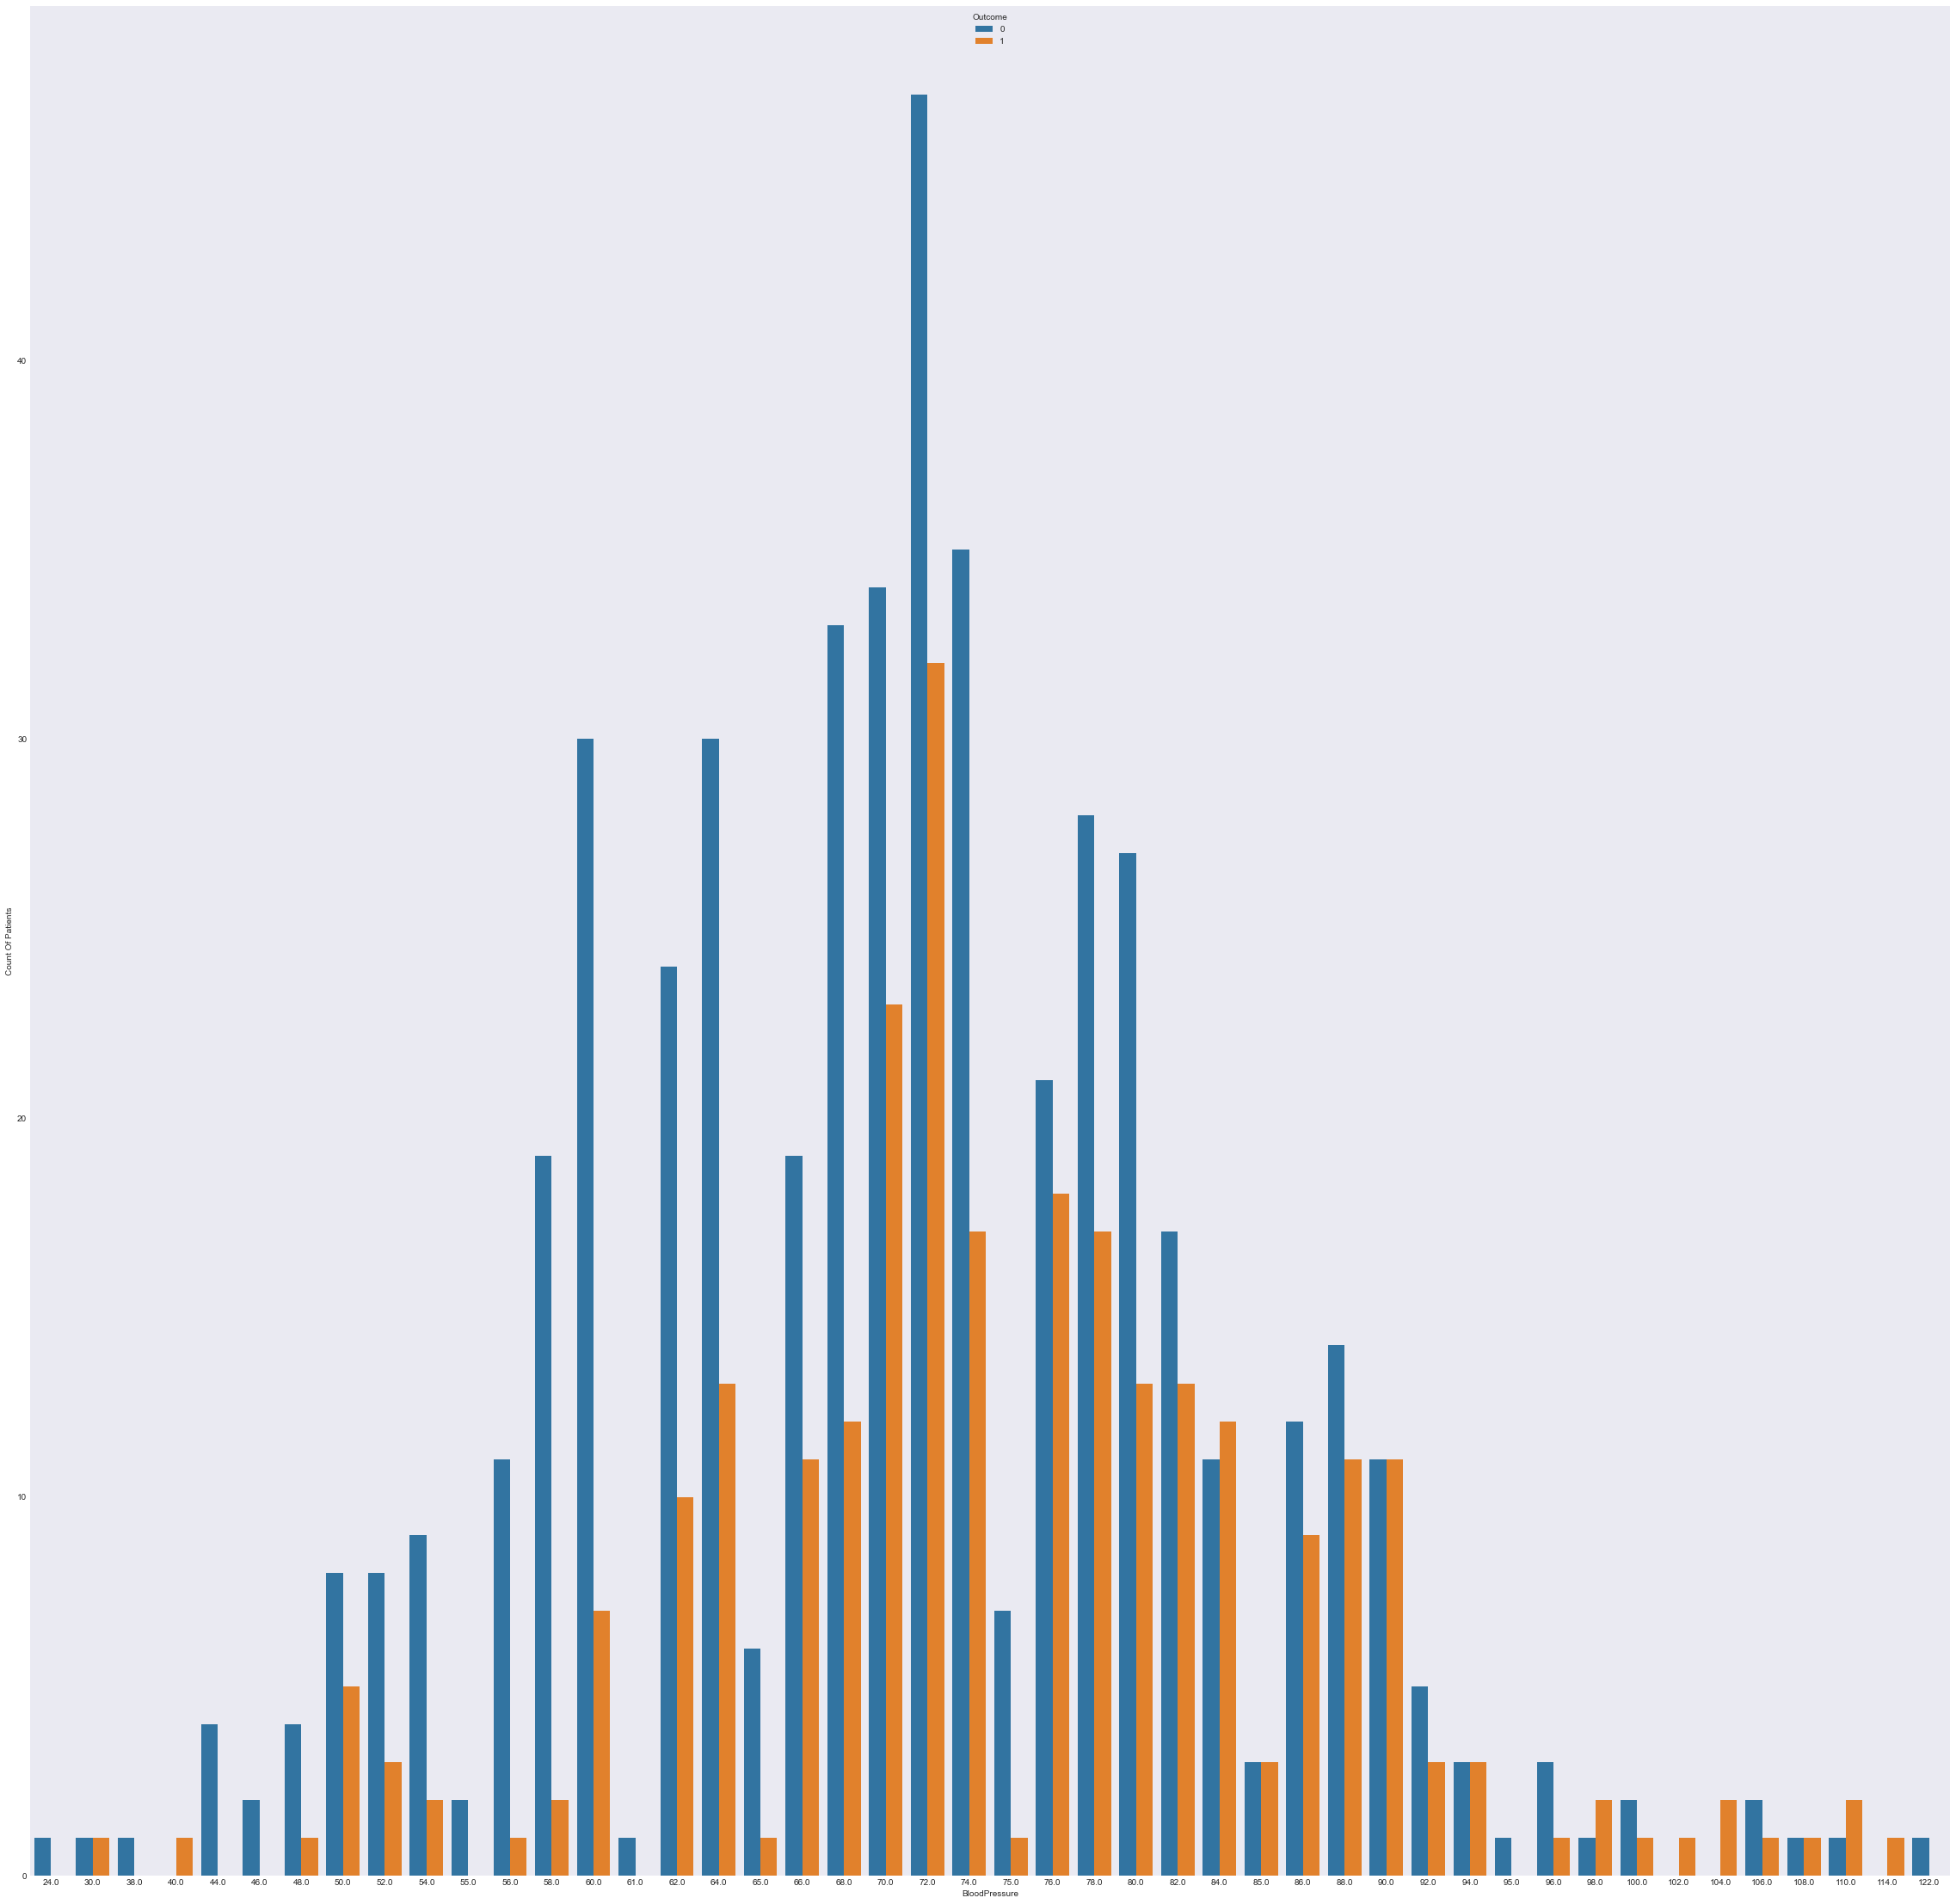

In [18]:
plt.figure(figsize=(40,40))
sns.countplot(x = 'BloodPressure',hue = 'Outcome',data = df1)

plt.xlabel("BloodPressure")
plt.ylabel("Count Of Patients")


Text(0, 0.5, 'Count Of Patients')

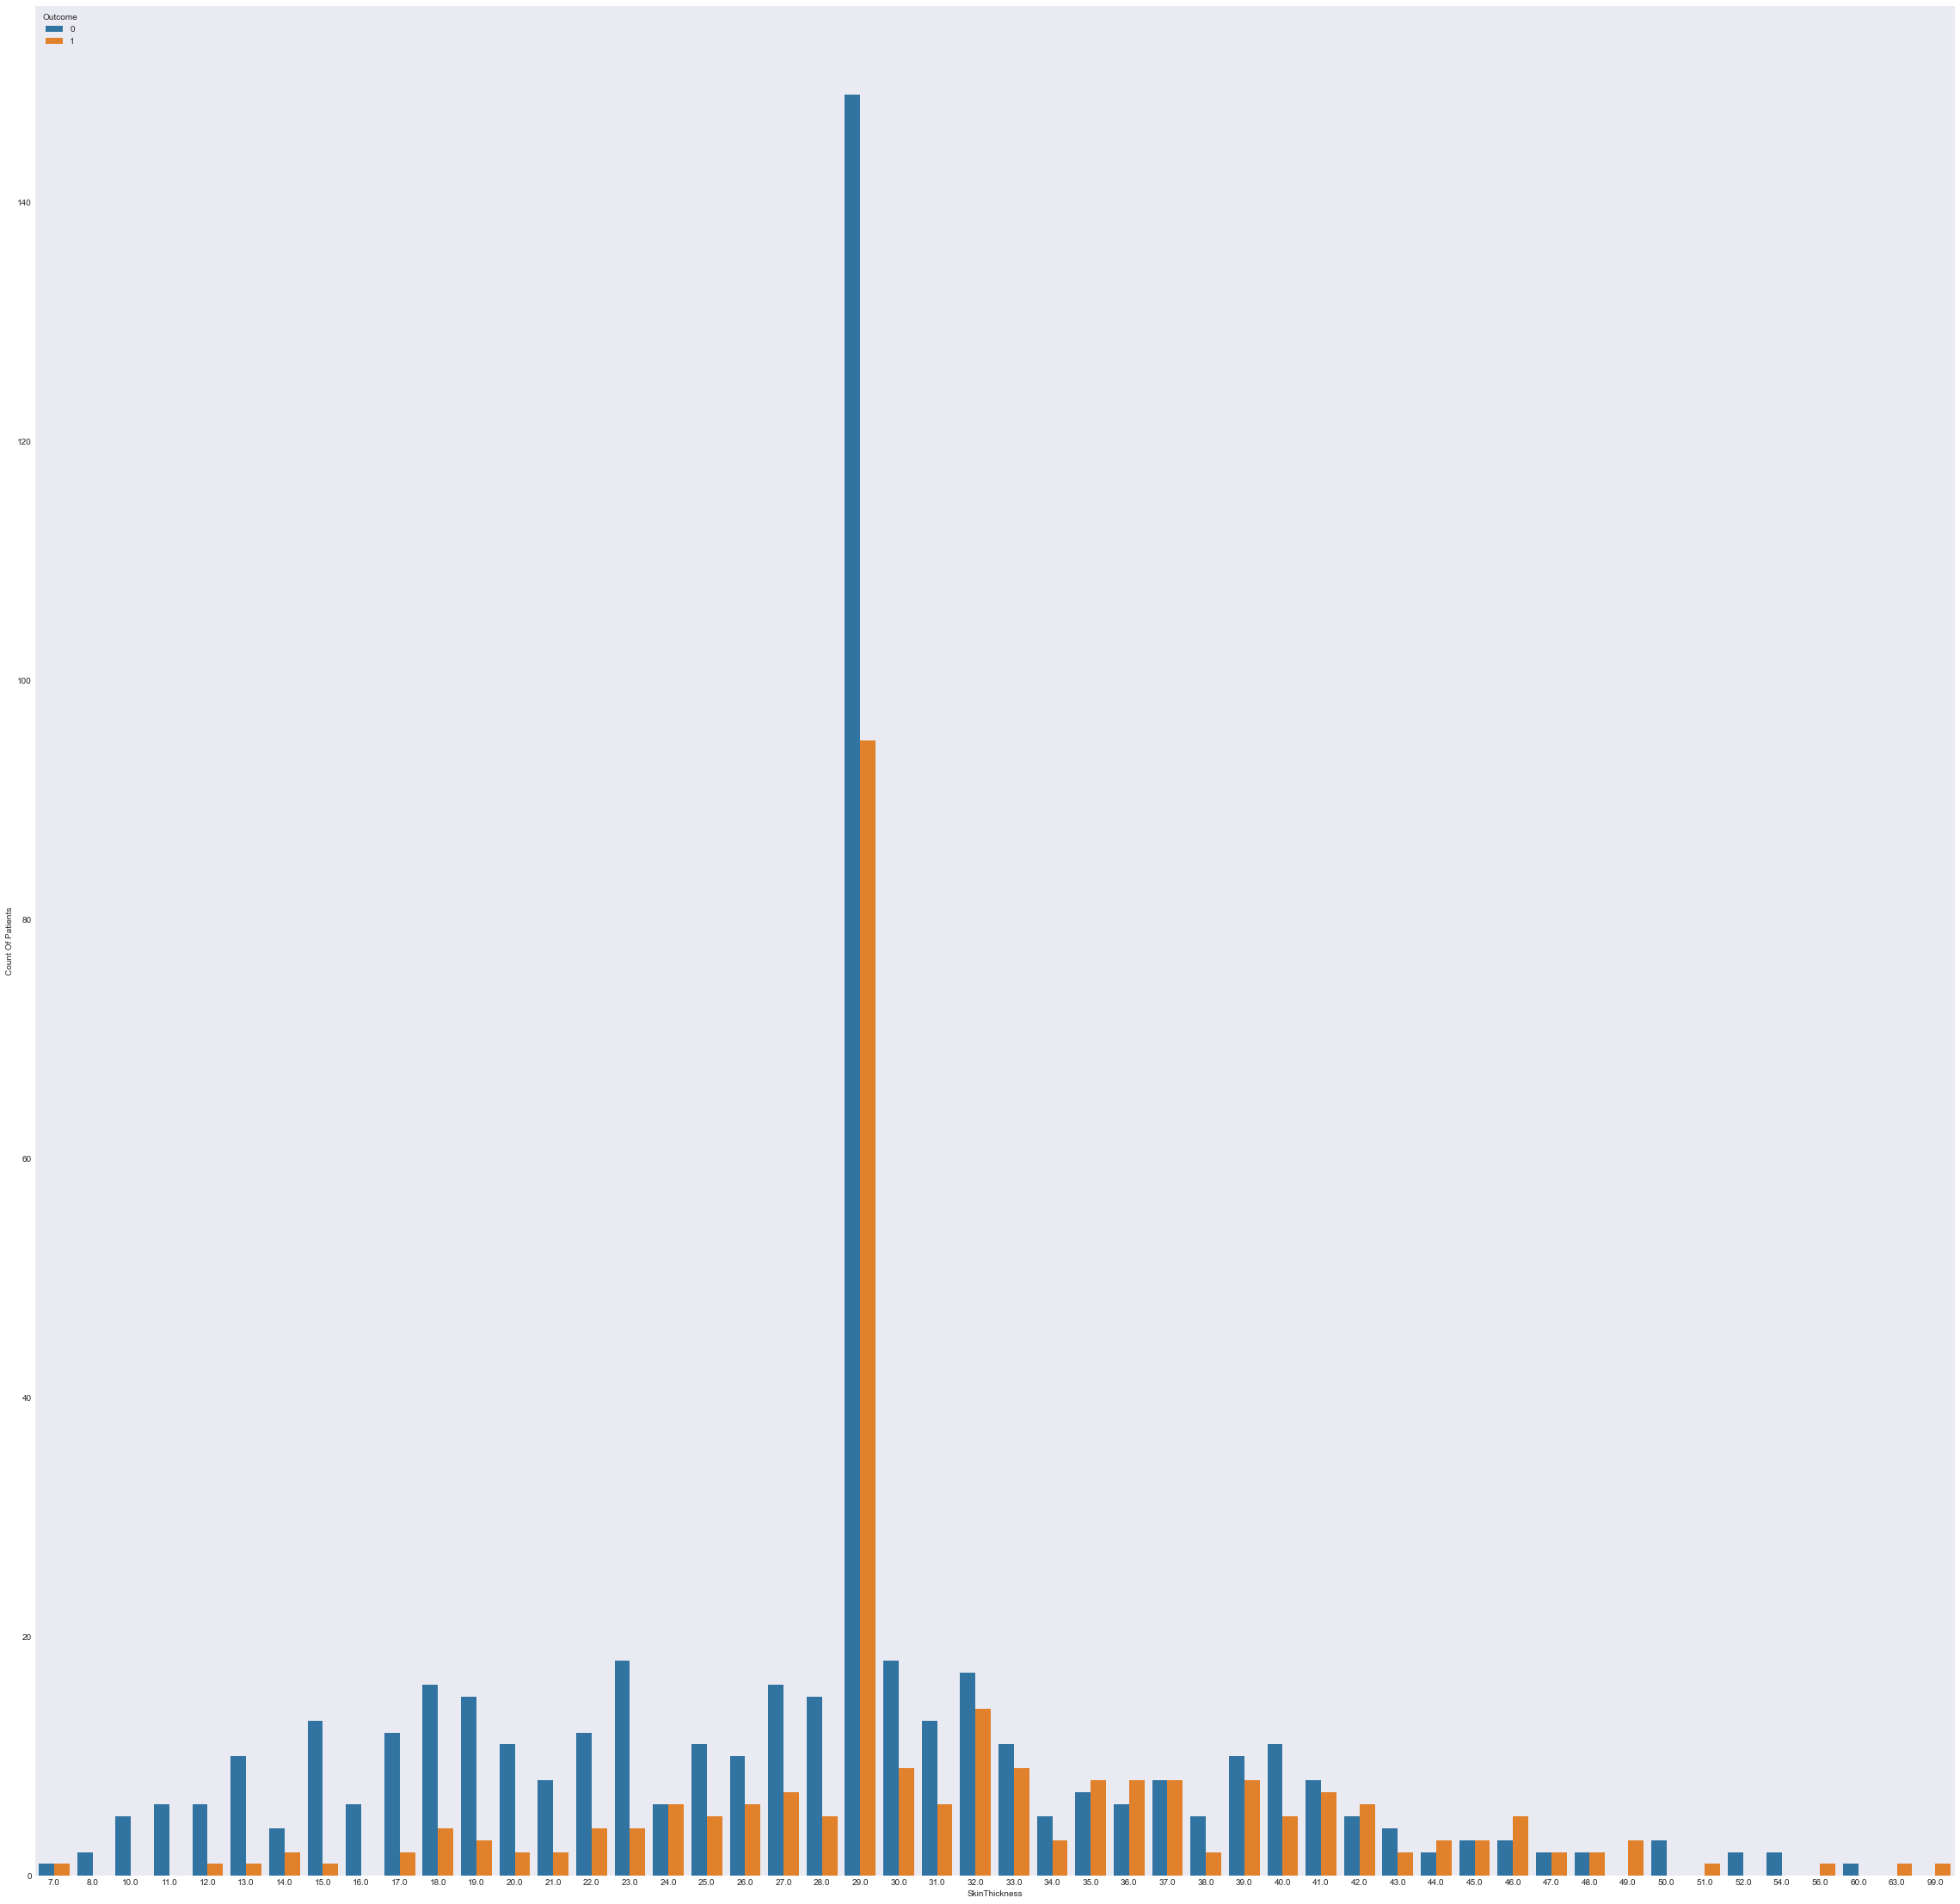

In [19]:
plt.figure(figsize=(40,40))
sns.countplot(x = 'SkinThickness',hue = 'Outcome',data = df1)

plt.xlabel("SkinThickness")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

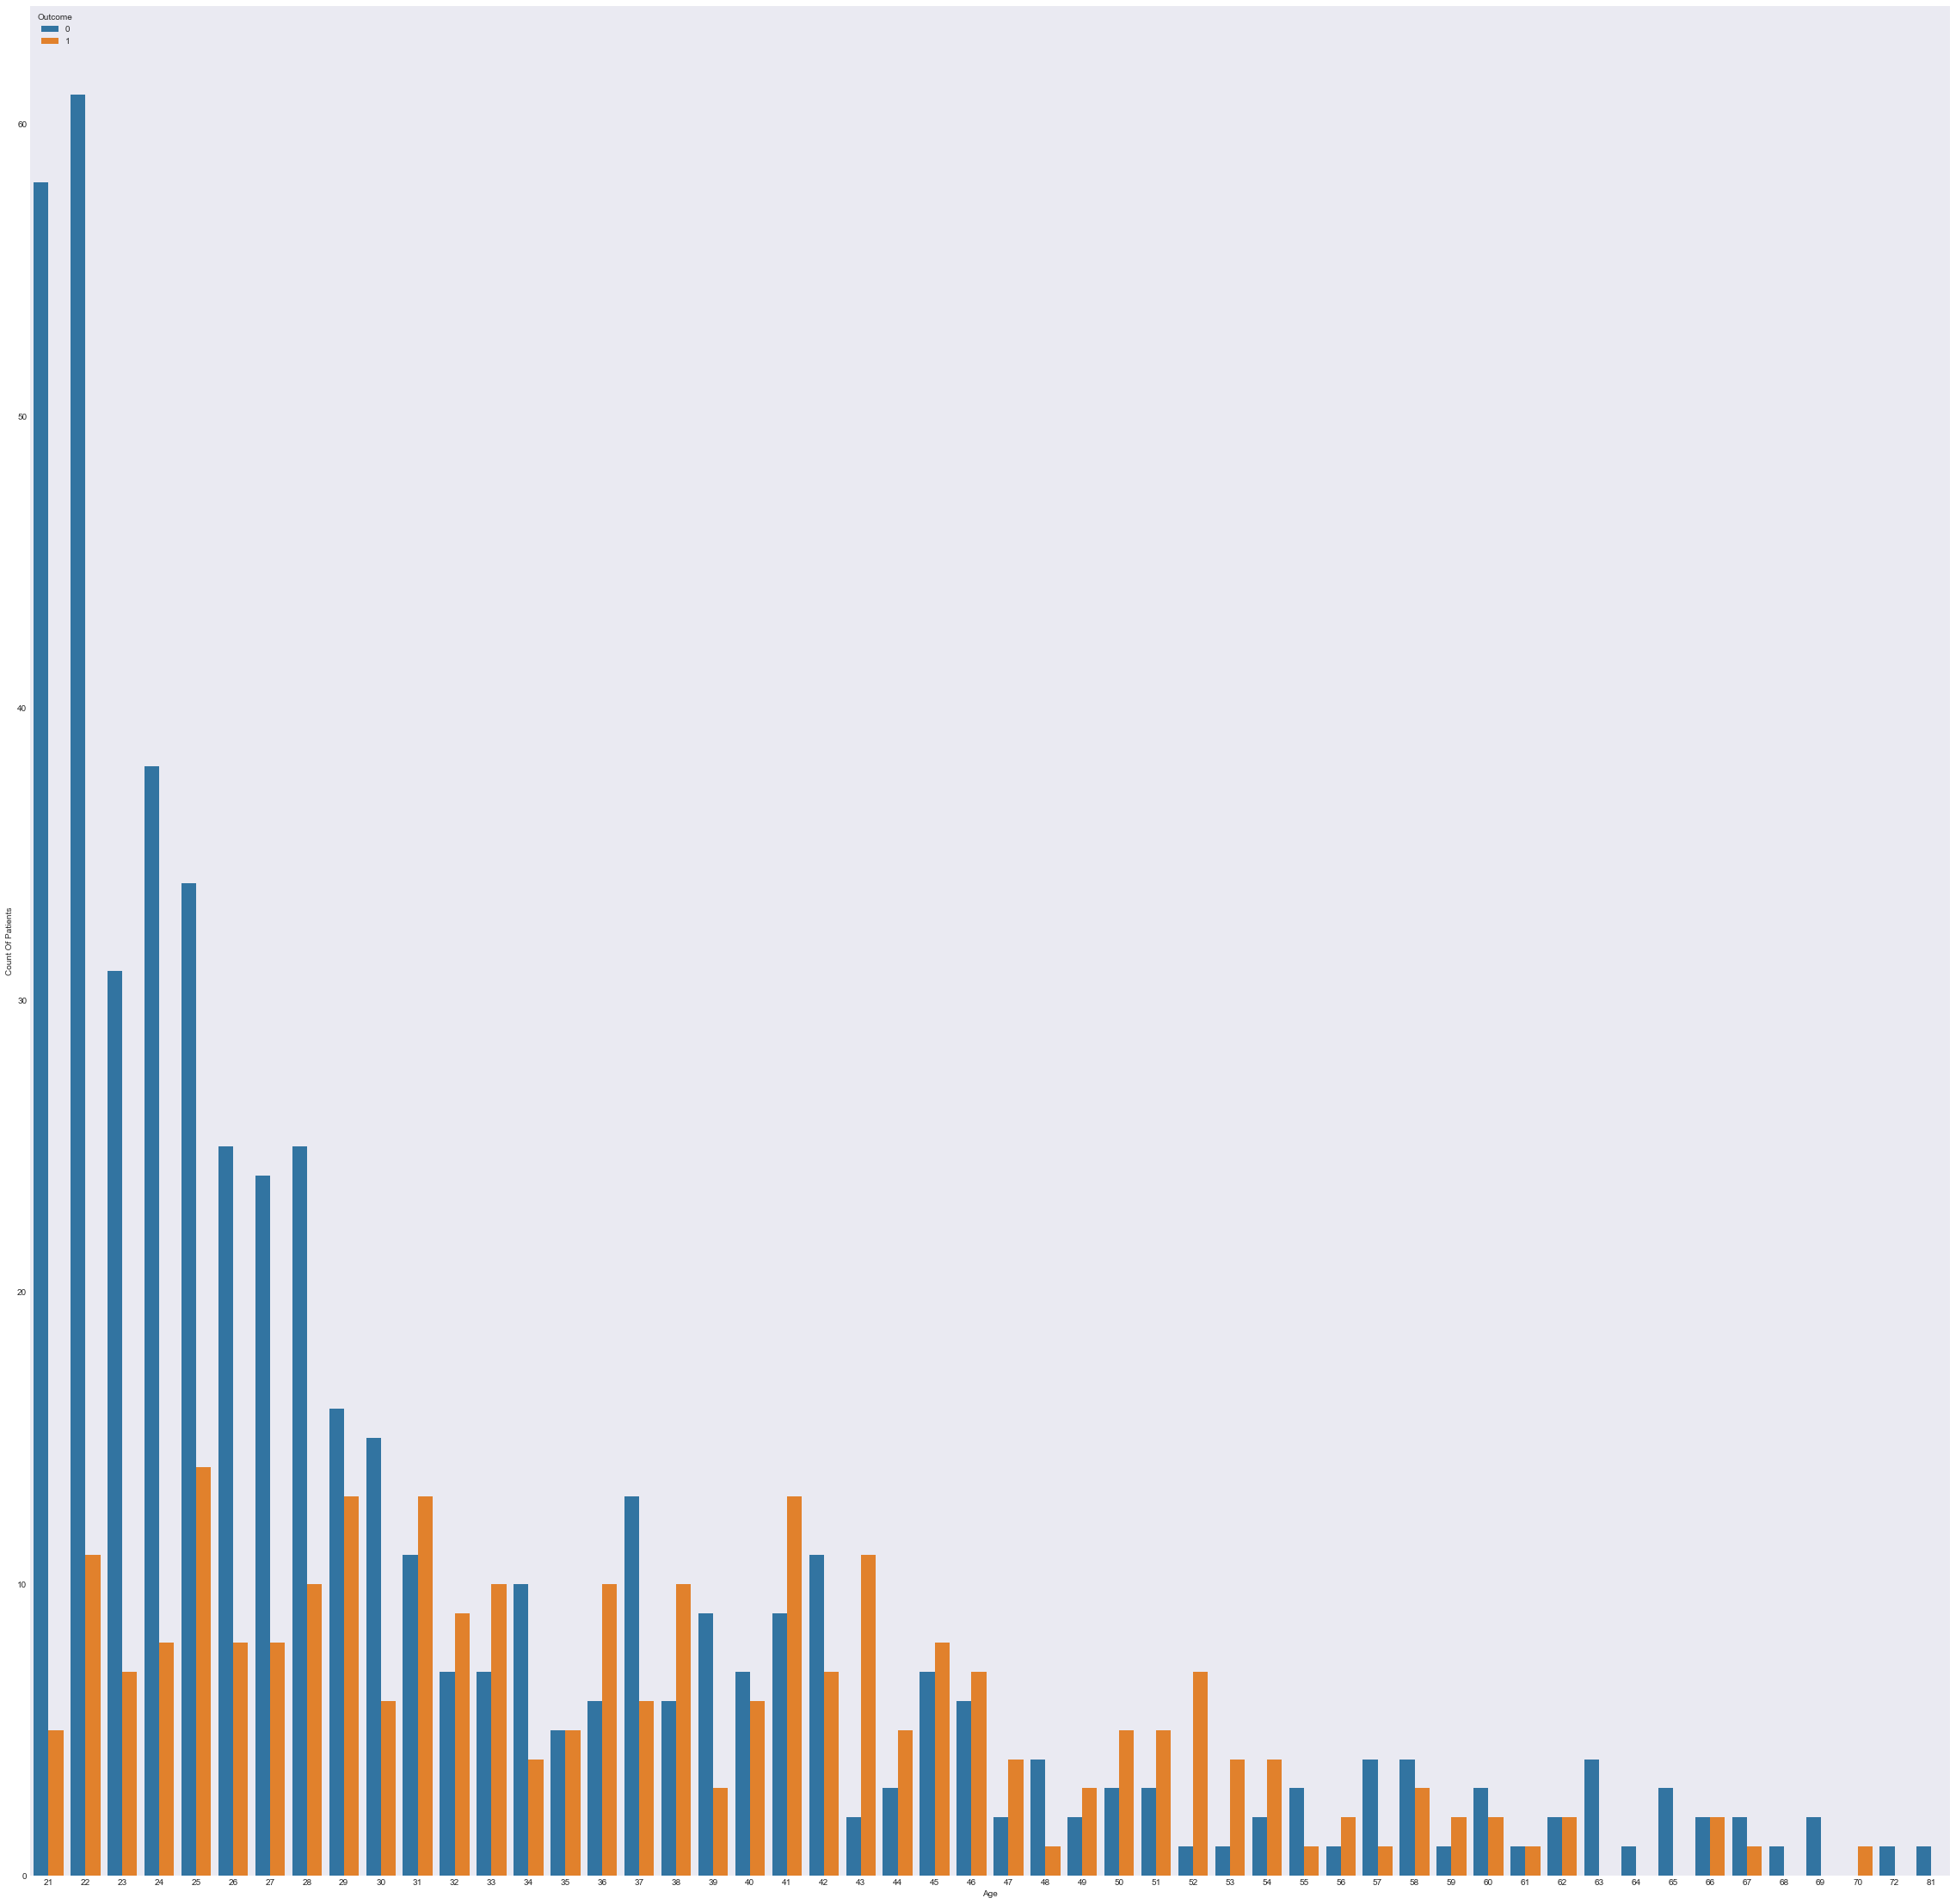

In [20]:
plt.figure(figsize=(40,40))
sns.countplot(x = 'Age',hue = 'Outcome',data = df1)

plt.xlabel("Age")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

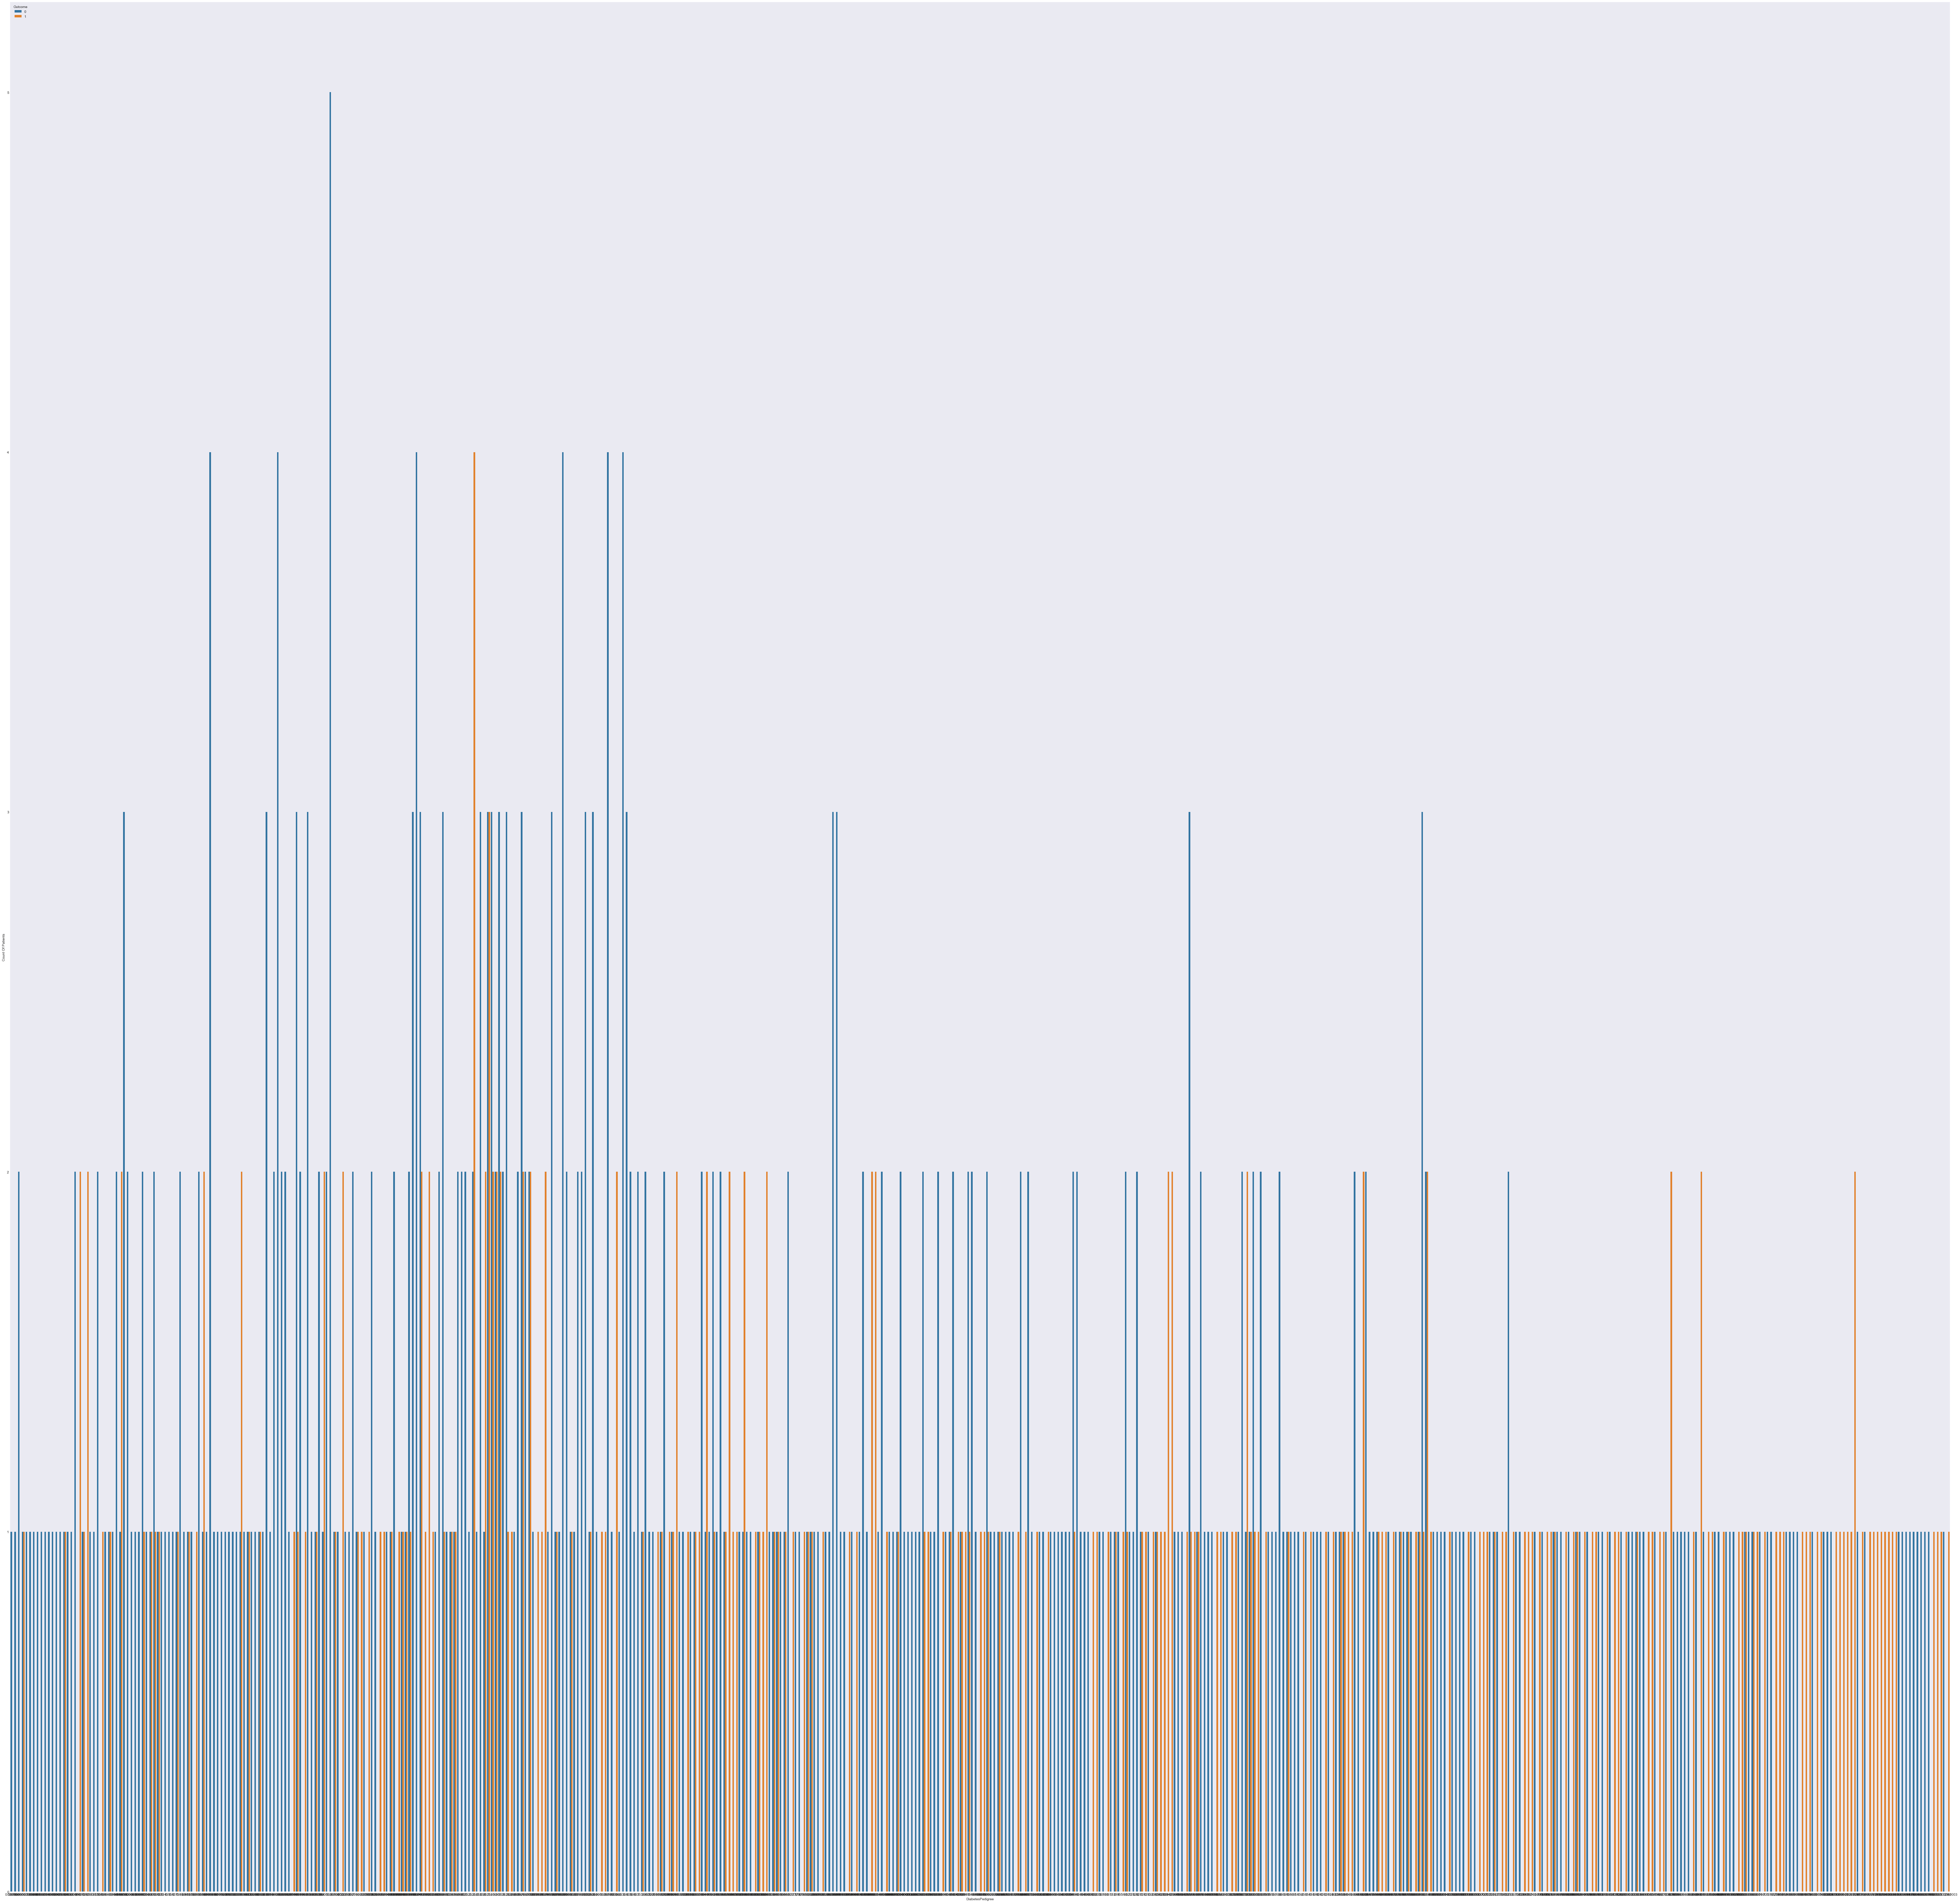

In [21]:
plt.figure(figsize=(100,100))
sns.countplot(x = 'DiabetesPedigreeFunction',hue = 'Outcome',data = df1)

plt.xlabel("DiabetesPedigree")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

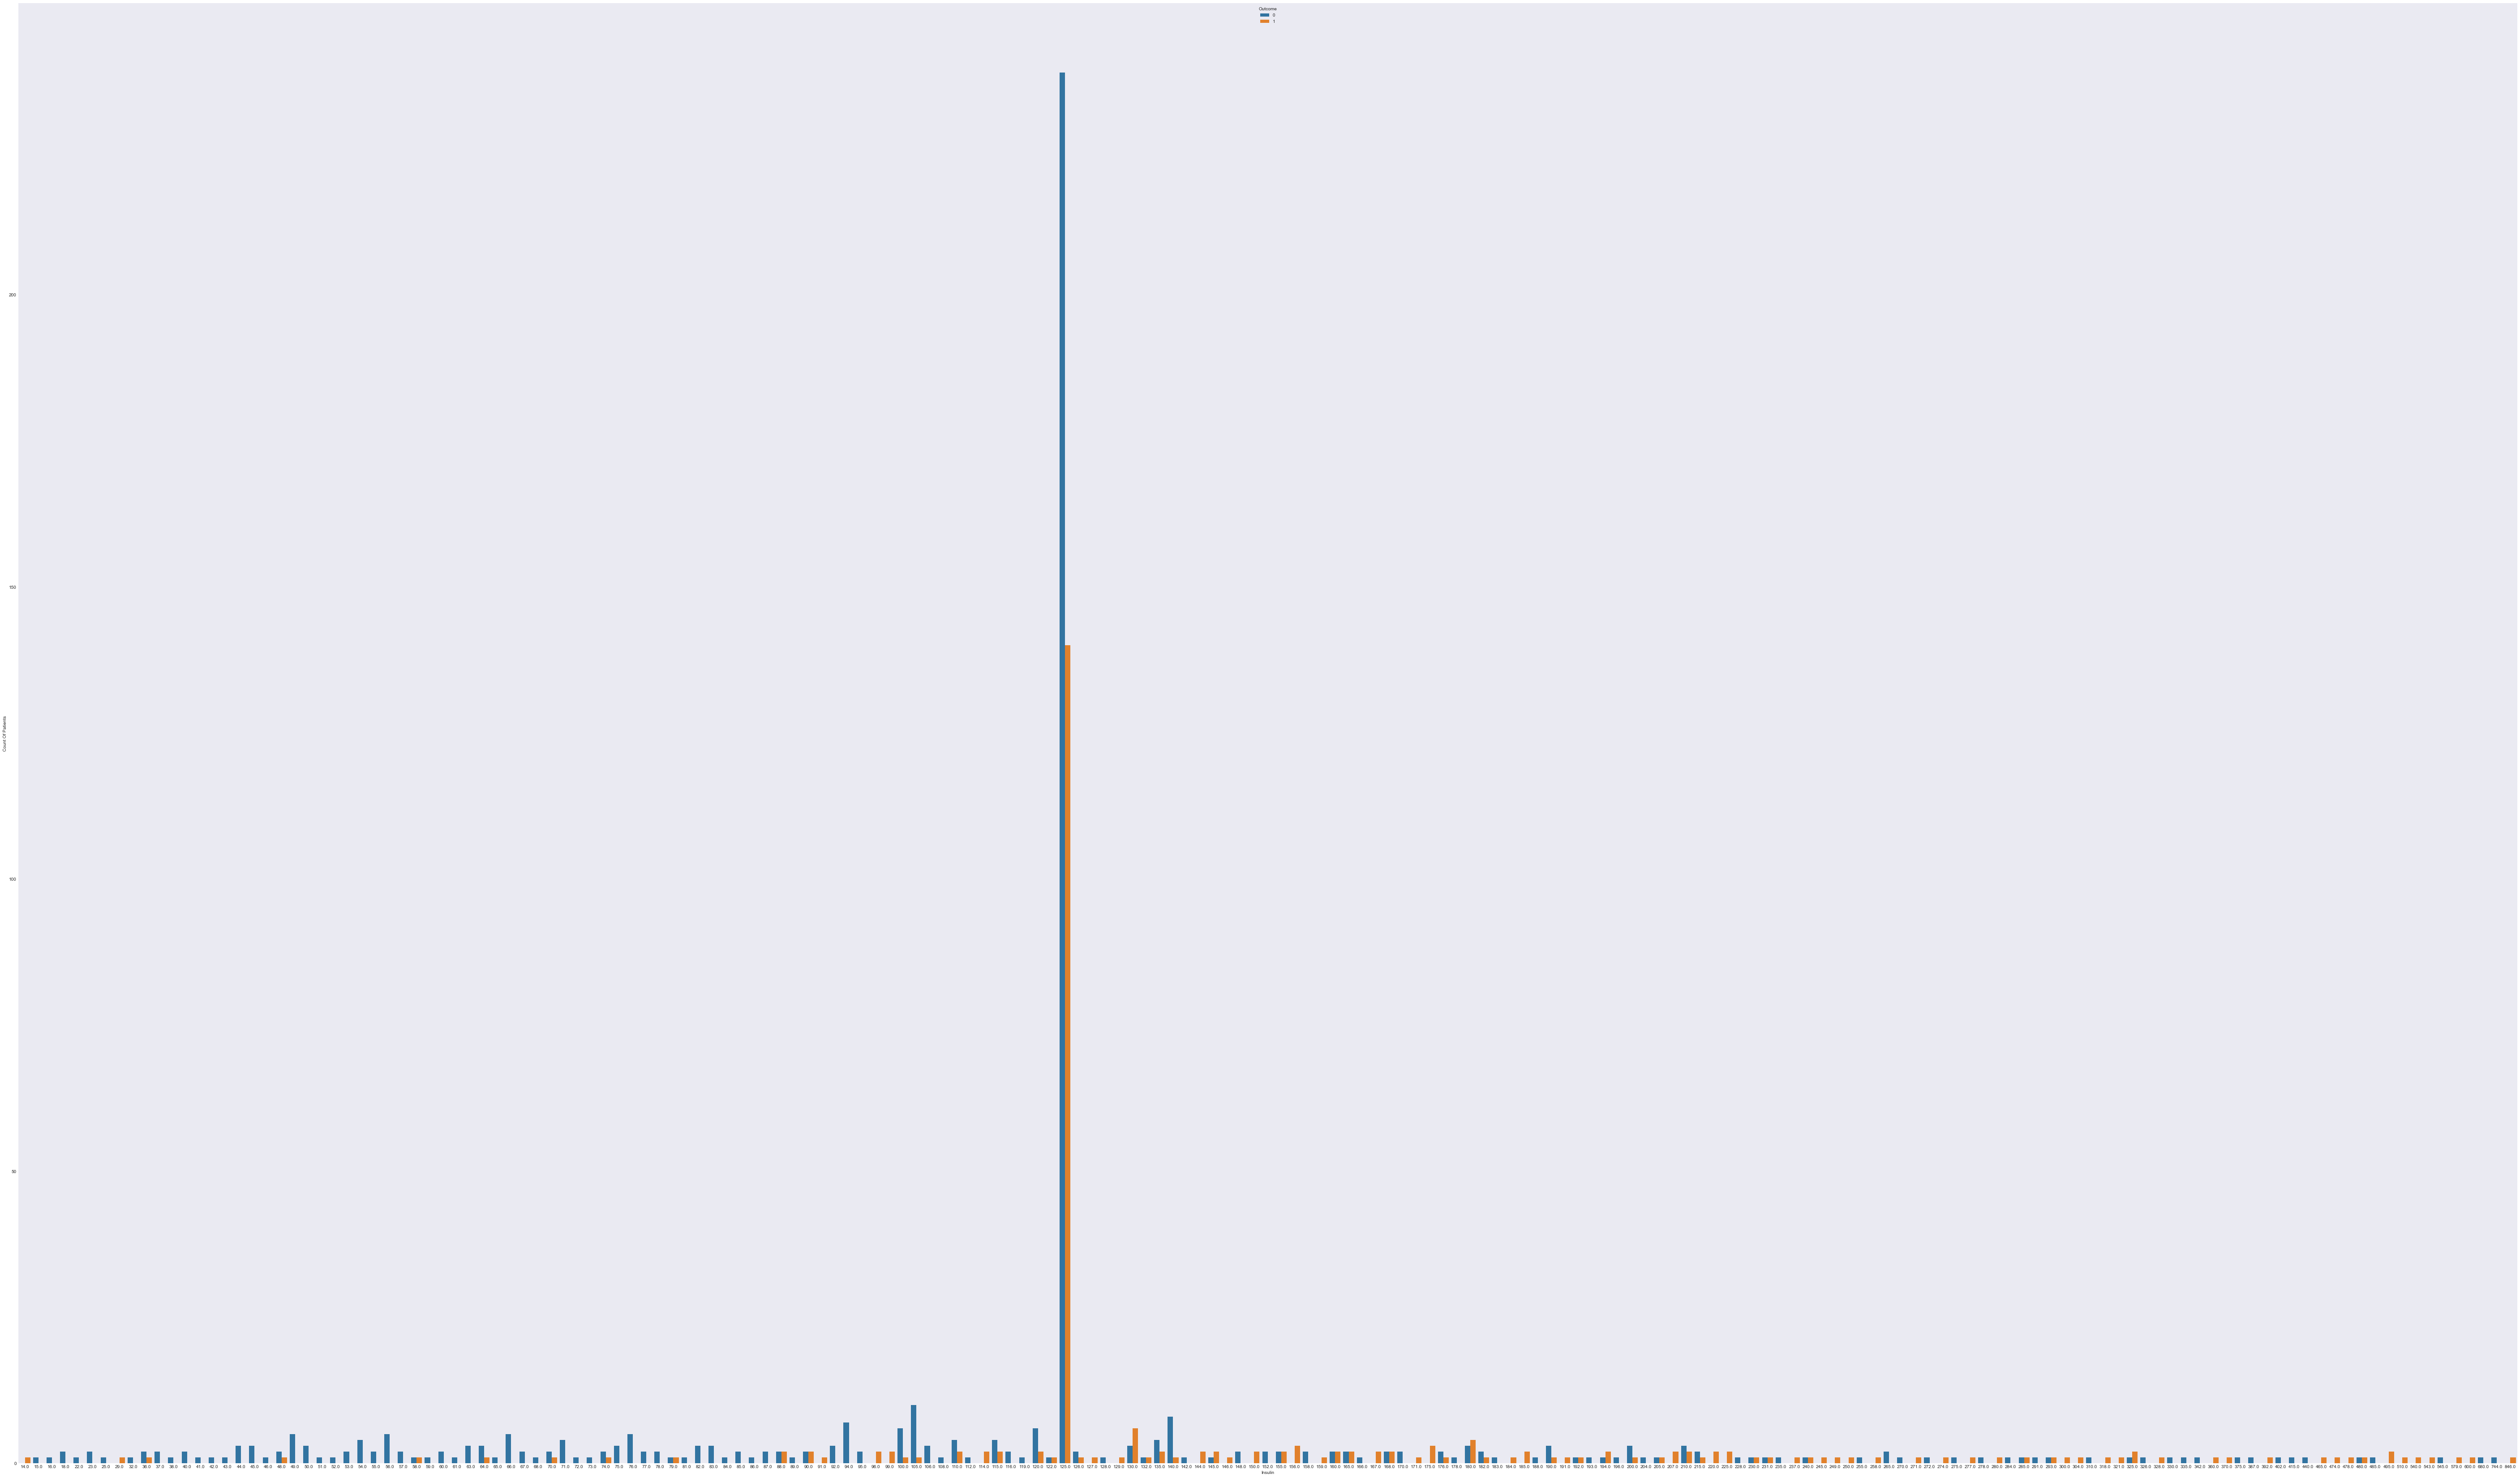

In [22]:
plt.figure(figsize=(100,60))
sns.countplot(x = 'Insulin',hue = 'Outcome',data = df1)

plt.xlabel("Insulin")
plt.ylabel("Count Of Patients")

In [23]:
df1['Outcome'].value_counts().to_frame()


,Outcome
0,500
1,268


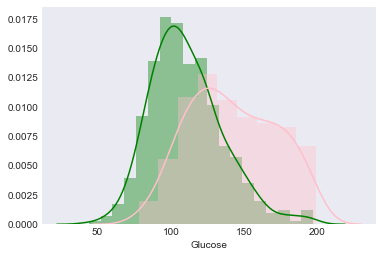

In [24]:
sns.distplot(df1[df1['Outcome'] == 0]["Glucose"], color='green') # Healthy - green
sns.distplot(df1[df1['Outcome'] == 1]["Glucose"], color='pink') # Diabetic - Red


In [25]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [26]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [28]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 4)
# Scaling to bring values to the same range
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


KNN Model

In [29]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print("Confusion matrix:\n",confusion_matrix(y_test,yhat))


[0.68831169 0.70562771 0.72294372 0.75324675 0.77056277 0.77922078
 0.76190476 0.77489177 0.77489177]
Confusion matrix:
 [[125  27]
 [ 25  54]]


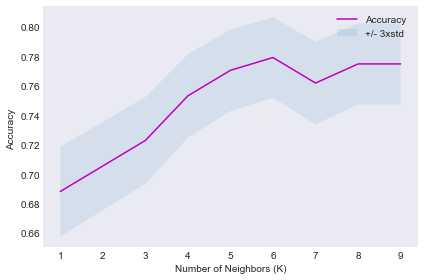

In [30]:
plt.plot(range(1,Ks),mean_acc,'m')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
# build model with best accuracy, K=6
knn_model = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
yhat = knn_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.7792207792207793

roc_auc_score:  0.7532061958694204


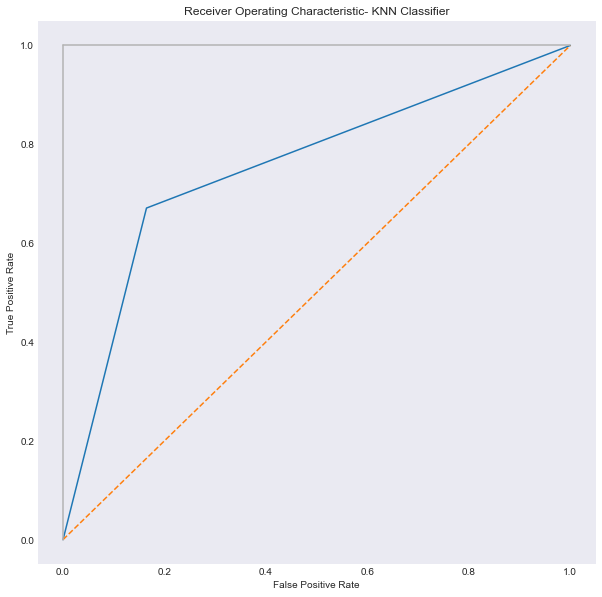

In [32]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic- KNN Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

LogisticRegression

In [33]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularisations = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
solver_mean_acc = {}
solver_std_acc = {}
solver_best_reg = {}
for solver in solvers:
    best_mean = 0
    best_std = 0
    best_reg = 0
    for reg in regularisations:
        lr = LogisticRegression(C=reg, solver=solver).fit(x_train, y_train)
        yhat = lr.predict(x_test)
        mean = metrics.accuracy_score(y_test, yhat)
        std = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
        if mean > best_mean:
            best_mean = mean
            best_std = std
            best_reg = reg
    solver_mean_acc[solver] = best_mean
    solver_std_acc[solver] = best_std
    solver_best_reg[solver] = best_reg

print(solver_mean_acc)
print("Confusion matrix:\n ",confusion_matrix(y_test,yhat))    




{'newton-cg': 0.8181818181818182, 'lbfgs': 0.8181818181818182, 'liblinear': 0.8051948051948052, 'sag': 0.8181818181818182, 'saga': 0.8181818181818182}
Confusion matrix:
  [[151   1]
 [ 79   0]]


In [34]:
solver_best_reg

{'newton-cg': 0.01, 'lbfgs': 0.01, 'liblinear': 1, 'sag': 0.01, 'saga': 0.01}

In [35]:
lr_model = LogisticRegression(C=1, solver='liblinear', max_iter=200).fit(x_train, y_train)
yhat = lr_model.predict(x_test)
mean = metrics.accuracy_score(y_test, yhat)
mean

0.8051948051948052

roc_auc_score:  0.7668637574950034


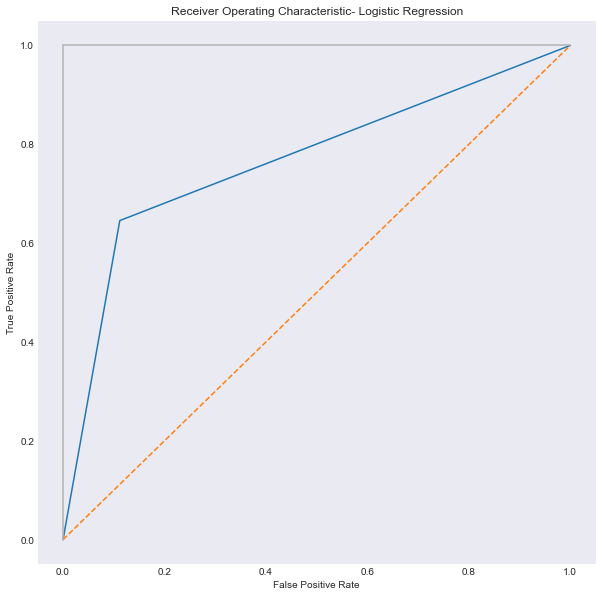

In [36]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic- Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


RandomForestRegressor

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [40]:
def evaluate(model, x_test, y_test):
    yhat = model.predict(x_test)
   # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat.round())
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat.round())
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat.round())
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat.round(),'weighted')
    print('F1 score: %f' % f1)
    # Jaccard Index
    jaccard=jaccard_score(y_test, yhat.round(),'weighted')
    print('Jaccard: %f' % jaccard)
    # kappa
    kappa = cohen_kappa_score(y_test, yhat.round())
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat.round())
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(y_test, yhat.round())
    print(matrix)
    
    return accuracy,precision,recall,f1,jaccard,kappa,auc,matrix


roc_auc_score:  0.7668637574950034


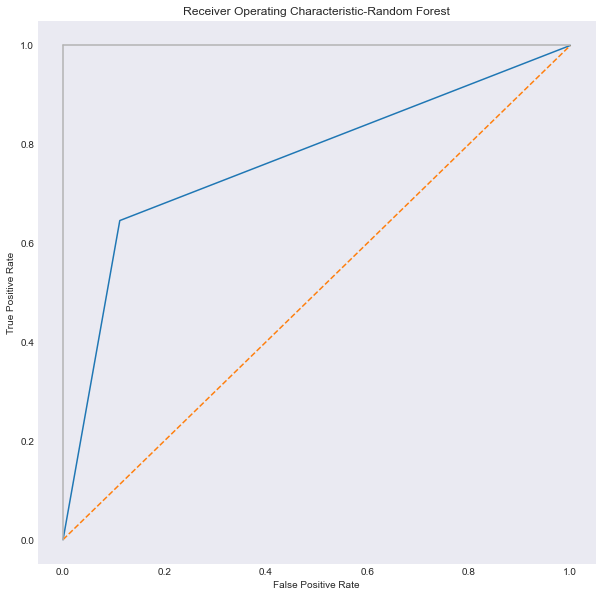

In [41]:
# Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yhat)
print('roc_auc_score: ', roc_auc_score(y_test, yhat))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic-Random Forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
df2 = pd.DataFrame(index=['KNN','Logistic Regression','Random Forest', ], 
                  columns=['Accuracy','Precision','Recall','Kappa', 'F1-score', 'ROC','Confusion Matrix', 'LogLoss'])

# KNN
yhat = knn_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)


df2.loc['KNN'] = [accuracy, precision, recall, kappa, f1, auc, matrix, np.nan]
print("-------------")
# Logistic Regression


yhat = lr_model.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
yhat_prob = lr_model.predict_proba(x_test)
ll = log_loss(y_test, yhat_prob)
print(ll)
df2.loc['Logistic Regression'] = [accuracy, precision, recall, kappa, f1, auc, matrix,ll]

print("-------------")
# Random Forest
yhat = rf_random.predict(x_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df2.loc['Random Forest'] = [accuracy, precision, recall, kappa,f1, auc, matrix,np.nan]



                  

Accuracy: 0.779221
Precision: 0.679487
Recall: 0.670886
F1 score: 0.675159
Cohens kappa: 0.507956
ROC AUC: 0.753206
[[127  25]
 [ 26  53]]
-------------
Accuracy: 0.805195
Precision: 0.750000
Recall: 0.645570
F1 score: 0.693878
Cohens kappa: 0.552191
ROC AUC: 0.766864
[[135  17]
 [ 28  51]]
0.43626351838797006
-------------
Accuracy: 0.792208
Precision: 0.686747
Recall: 0.721519
F1 score: 0.703704
Cohens kappa: 0.543854
ROC AUC: 0.775233
[[126  26]
 [ 22  57]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=weighted as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=weighted as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=weighted as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [45]:
df2

,Accuracy,Precision,Recall,Kappa,F1-score,ROC,Confusion Matrix,LogLoss
KNN,0.779221,0.679487,0.670886,0.507956,0.675159,0.753206,"[[127, 25], [26, 53]]",NaN
Logistic Regression,0.805195,0.75,0.64557,0.552191,0.693878,0.766864,"[[135, 17], [28, 51]]",0.436264
Random Forest,0.792208,0.686747,0.721519,0.543854,0.703704,0.775233,"[[126, 26], [22, 57]]",NaN
